In [3]:
#dataframes
import pandas as pd
import h5py

import sys
sys.path.append('../')
import odor_statistics_lib as osm

# user defined functions

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

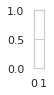

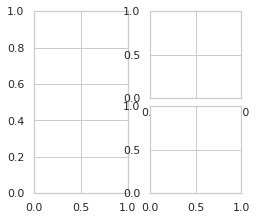

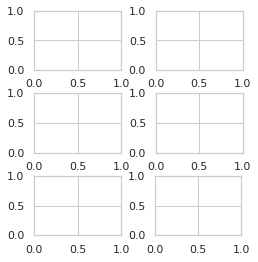

In [4]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/r2AicStatPlot.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [8]:
dir = '~/DataAnalysis/data/Sprints/HighRes/LookbackTimeAnalysis/'
df1=pd.read_hdf(dir+'HWSLTall.h5')
df2 = pd.read_hdf(dir+'LWSLTall.h5')
df3 = pd.read_hdf(dir+'ForestLTall.h5')

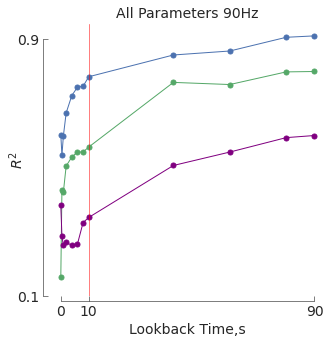

In [9]:
f,ax=plt.subplots(1,1,figsize=(5,5))
line_width=1
msize=5

ax.grid(False)
ax.plot(df1.time,df1.rsquared, label='WS>3.5m/s',c='b',linewidth=line_width,rasterized=True)
ax.plot(df1.time,df1.rsquared,'o',c='b',markersize=msize,rasterized=True)

ax.plot(df2.time,df2.rsquared, label='WS<3.5m/s',c='g',linewidth=line_width,rasterized=True)
ax.plot(df2.time,df2.rsquared,'o',c='g',markersize=msize,rasterized=True)

ax.plot(df3.time,df3.rsquared, label='Forest',c='purple',linewidth=line_width,rasterized=True)
ax.plot(df3.time,df3.rsquared,'o',c='purple',markersize=msize,rasterized=True)

ax.axvline(10, color = 'red', alpha=0.5, linewidth=line_width)

ax.set_rasterization_zorder(-20)

ax.set_xlabel('Lookback Time,s')
ax.xaxis.set_label_coords(0.5, -0.1)

ax.set_ylabel('$R^2$')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.set_title('All Parameters 90Hz')
# ax.text(11,0.29,'$LT$=10s',fontsize='14',c='black')

mpl_functions.adjust_spines(ax,['left','bottom'],
                                spine_locations={'left': 5, 'bottom': 5}, 
                                smart_bounds=True,
                                xticks=[0,10,90],
                                yticks=[0.1,0.9],
                                linewidth=0.5)


figurefirst.mpl_functions.set_fontsize(ax, 14)
f.savefig('../../../Figure/Lookbackall.jpeg', dpi=300, bbox_inches = "tight")

### R2 vs LT 

In [3]:
dir='~/DataAnalysis/Figure/outputs/Fig6Assets/'
df = pd.read_hdf(dir+'R2LtTime.h5')
line_width=0.5
msize=3
ax=layout.axes[('fig1','ax1')]
ax.grid(False)
ax.plot(df.time,df.r2_hws, label='WS>3.5m/s',c='b',linewidth=line_width,rasterized=True)
ax.plot(df.time,df.r2_hws,'o',c='b',markersize=msize,rasterized=True)

ax.plot(df.time,df.r2_lws, label='WS<3.5m/s',c='g',linewidth=line_width,rasterized=True)
ax.plot(df.time,df.r2_lws,'o',c='g',markersize=msize,rasterized=True)

ax.plot(df.time,df.r2_forest, label='Forest',c='purple',linewidth=line_width,rasterized=True)
ax.plot(df.time,df.r2_forest,'o',c='purple',markersize=msize,rasterized=True)

ax.axvline(10, color = 'red', alpha=0.5, linewidth=line_width)

ax.set_rasterization_zorder(-20)

ax.set_xlabel('Lookback Time,s')
ax.xaxis.set_label_coords(0.5, -0.1)

ax.set_ylabel('$R^2$')
ax.yaxis.set_label_coords(-0.08, 0.5)

ax.text(11,0.29,'$LT$=10s',fontsize='14',c='black')

mpl_functions.adjust_spines(ax,['left','bottom'],
                                spine_locations={'left': 5, 'bottom': 5}, 
                                smart_bounds=True,
                                xticks=[0,20],
                                yticks=[0.2,0.9],
                                linewidth=0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')

### Whiff Distribution Statistics

In [4]:
dir = '~/DataAnalysis/data/Sprints/HighRes/'
df = pd.read_hdf(dir+'All_Datasets_Predictions.h5')

#### MC Mean

In [5]:
# from scipy import stats
# a = df.wd_mean
# b = df.distance

# slope, intercept, r_value, p_value, std_err = stats.linregress(b,a)

# if p_value<=0.05:
#     print ('significant')
#     print('r2_value:', "{:e}".format(r_value**2))
#     print("p_value:", "{:e}".format(p_value))

# else:
#     print ('insignificant')
#     print('r2_value:', "{:e}".format(r_value**2))
#     print("p_value:", "{:e}".format(p_value))

# print(r_value**2,p_value)


In [6]:
ax=layout.axes[('fig1','ax2')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.mc_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=0, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.set_rasterization_zorder(-20)

# ax.set_xlabel('Dist. from Source,m')
# ax.xaxis.set_label_coords(0.47, -0.1)

ax.set_ylabel('$\mu(WC)$,a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[4.5,10.5],
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')


#### WF Mean

In [7]:
ax=layout.axes[('fig1','ax3')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.wf_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=0, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)


ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WF)$,hz')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,6],
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')


#### WD Mean

In [8]:
ax=layout.axes[('fig1','ax4')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.wd_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=0, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WD)$,s')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[-2.3,1.5],
                            linewidth=0.5)

ax.set_yticklabels([r'$10^{-2.3}$',r'$10^{1.5}$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')

#### WMA Mean

In [9]:
ax=layout.axes[('fig1','ax5')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.ma_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=0, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.set_rasterization_zorder(-20)

ax.set_ylabel('$\mu(WMA)$,a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)

ax.set_xlabel('Dist. from\n Source,m')
ax.xaxis.set_label_coords(0.47, -0.1)

mpl_functions.adjust_spines(ax,['left', 'bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[-1,11],
                            linewidth=0.5)

ax.set_yticklabels([r'$10^{-1}$',r'$10^{1.1}$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')

#### WSD Mean

In [10]:
ax=layout.axes[('fig1','ax6')]
ax.grid(False)
dataframe=df
distance = dataframe.distance
test_var=(dataframe.st_mean)
var1 = ax.scatter(distance,test_var, c=dataframe.mc_mean,cmap='bone_r', edgecolors='none', s=4,
                  vmin=0, vmax=10, rasterized=True)
g1 = sns.regplot(x=distance,y=(test_var) , data=dataframe,
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)

ax.set_rasterization_zorder(-20)
ax.set_ylabel('$\mu(WSD)$, a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)

mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            xticks=[0,50],
                            yticks=[0,2.5],
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')


### Colorbar

In [11]:
ax = layout.axes[('cbarfig', 'cbar')]
ytic=[4.5,11]

fpl.colorbar(ax=ax, colormap='bone_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['left'], 
                                    smart_bounds=True,
                                    spine_locations={'left': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$\mu(WC)$, a.u.",rotation=90, labelpad=-12)

ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['cbarfig'], 'cbarfig', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')

### Bootstrapped R2

In [4]:
df = pd.read_hdf(dir+'R2_AIC/all_Rsquared.h5')

In [13]:
ax=layout.axes[('fig2','ax7')]
ax.grid(False)
sns.stripplot(data=df, ax=ax, dodge=True, size=3, orient="h",color='Black', rasterized=True)
ax.set_rasterization_zorder(-20)

label=['min(WC)','max(WC)','$\mu(WC)$','$\sigma(WC)$', '$WC_k$',
      'min(WF)','max(WF)','$\mu(WF)$','$\sigma(WF)$', '$WF_k$',
      'min(WD)','max(WD)','$\mu(WD)$','$\sigma(WD)$', '$WD_k$',
      'min(WMA)','max(WMA)','$\mu(WMA)$','$\sigma(WMA)$', '$WMA_k$',
      'min(WSD)','max(WSD)','$\mu(WSD)$','$\sigma(WSD)$', '$WSD_k$']

ax.axvline(0.05, color = 'blue', linewidth=0.5)

ax.set_xlabel('$R^2$')
ax.xaxis.set_label_coords(0.5,-0.05)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,                            
                            xticks=[0,0.7],
                            linewidth=0.5)


ax.text(0.06,2.2,'$R^2$=0.05',fontsize='14',c='blue')
ax.set_yticklabels(label, rotation=0)

ax.get_yticklabels()[0].set_color('blue')
ax.get_yticklabels()[1].set_color('blue')
ax.get_yticklabels()[2].set_color('blue')
ax.get_yticklabels()[3].set_color('blue')
ax.get_yticklabels()[5].set_color('blue')
ax.get_yticklabels()[9].set_color('blue')
ax.get_yticklabels()[11].set_color('blue')
ax.get_yticklabels()[12].set_color('blue')
ax.get_yticklabels()[13].set_color('blue')
ax.get_yticklabels()[14].set_color('blue')
ax.get_yticklabels()[15].set_color('blue')
ax.get_yticklabels()[16].set_color('blue')
ax.get_yticklabels()[18].set_color('blue')
ax.get_yticklabels()[21].set_color('blue')
ax.get_yticklabels()[22].set_color('blue')
ax.get_yticklabels()[23].set_color('blue')

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')


### Boootstrapped R2 and AIC for filtered parameters 

In [14]:
combtest=pd.read_hdf(dir+'R2_AIC/AllRsquaredAicCombinations.h5')
aic_table=pd.read_hdf(dir+'R2_AIC/All_AicDeltaTab.h5')

In [15]:
ax=layout.axes[('fig2','ax8')]
ax.grid(False)
g=sns.stripplot(x=combtest.n_para,y=combtest.rsquared,data=combtest, 
              ax=ax, color='black',
              dodge=True,s=1,rasterized=True)
g.set(xlabel=None, ylabel=None)
ax.set_ylabel('$R^2$',rotation=0)
ax.yaxis.set_label_coords(1.15,0.5)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax,['right'],
                            spine_locations={'right': 4, 'bottom': 5}, 
                            smart_bounds=True,                            
                            yticks=[0,0.7],
#                             yticks=[0,1,2,3,4,5,6,7,8],
                            linewidth=0.5)
# ax.set_xticklabels(np.arange(1,len(aic_table)+1,1))
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')

In [16]:
ax=layout.axes[('fig2','ax9')]
ax.grid(False)
g=sns.stripplot(x=combtest.n_para,y=combtest.aic, data=combtest, color='black',
              ax=ax,dodge=True,s=1,rasterized=True)
g.set(xlabel=None, ylabel=None)
ax.set_ylabel('$AIC$',rotation=0)
ax.yaxis.set_label_coords(1.15,0.5)
ax.set_xlabel('# Parameters')
ax.xaxis.set_label_coords(0.5,-0.17)
ax.scatter(np.arange(0,len(aic_table),1),aic_table.aic_min,c='red', 
            marker='o', s=5, facecolor=None,rasterized=True)
ax.plot(np.arange(0,len(aic_table),1),aic_table.aic_min,c='red',alpha=0.2,rasterized=True)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['right','bottom'],
                            spine_locations={'right': 4,'bottom': 5}, 
                            smart_bounds=True,                            
                            yticks=[10500,12000],
#                             xticks=[0,9],
                            linewidth=0.5)
# ax.set_xticklabels([r'$1$',r'$9$'])
ax.set_xticklabels(np.arange(1,len(aic_table)+1,1))
# ax.set_yticklabels(['10500','12000'],rotation=90)
# ax.set_xticklabels([r'$10.5*10^{3}$',r'$12*10^{32}$'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/r2AicStatPlot.svg')